# Dhh1p analysis

In [665]:
%reset -f
%matplotlib inline
import pandas as pd
import numpy as np
import scipy
from scipy.stats import pearsonr, spearmanr, ttest_ind, levene, f_oneway
import seaborn as sns; sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt
import csv
import string
import warnings
warnings.filterwarnings('ignore')

sns.set(style="ticks", color_codes=True,font_scale=2)
#current_palette = sns.color_palette("Set1", n_colors=5, desat=.5)
#sns.palplot(current_palette) 
snsRed, snsBlue, snsGreen, snsPurple, snsOrange = sns.color_palette("Set1", n_colors=5, desat=.5)

## 1. Load files

In [666]:
folder = "/seq/schatz/hfang/Projects/RiboSeq/Radhakrishnan_2016/new_te_analysis"

wt_rep1 = folder + "/SRR3493886/genesTE.csv"
wt_rep2 = folder + "/SRR3493887/genesTE.csv"
wt_rep1_riboseq_abundance = "../Data/Radhakrishnan/wt_riboseq_abundance.tsv"
codon_wt_rep1 = folder + "/SRR3493886/codons.csv"
codon_wt_rep2 = folder + "/SRR3493887/codons.csv"
Dhh1KO_rep1 = folder + "/SRR3493890/genesTE.csv"
Dhh1KO_rep2 = folder + "/SRR3493891/genesTE.csv"
codon_Dhh1KO_rep1 = folder + "/SRR3493890/codons.csv"
codon_Dhh1KO_rep2 = folder + "/SRR3493891/codons.csv"
Dhh1OE_rep1 = folder + "/SRR3493894/genesTE.csv"
Dhh1OE_rep2 = folder + "/SRR3493895/genesTE.csv"
codon_Dhh1OE_rep1 = folder + "/SRR3493894/codons.csv"
codon_Dhh1OE_rep2 = folder + "/SRR3493895/codons.csv"

original_fn = "/seq/schatz/hfang/Projects/RiboSeq/Radhakrishnan_2016/original_analysis/GSE81269_RPKM-All-Datasets.txt"
codon_weinberg = "../Data/skr_weinberg_codons.csv"
gene_tAI ="../Data/SacCer_stAIcalc_Sabi_Tuller.txt"
codon_stAI ="../Data/Yeast_codon_stAI.csv"
codon_tAI ="../Data/tAI.csv"

In [667]:
deltaTE_cutoff = 1

In [668]:
filesToLoad = [wt_rep1, wt_rep2, codon_wt_rep1, codon_wt_rep2, 
               Dhh1KO_rep1, Dhh1KO_rep2, codon_Dhh1KO_rep1, codon_Dhh1KO_rep2, 
               Dhh1OE_rep1, Dhh1OE_rep2, codon_Dhh1OE_rep1, codon_Dhh1OE_rep2,
               gene_tAI, codon_tAI, codon_weinberg, wt_rep1_riboseq_abundance]
DFs = {}
for f in filesToLoad:
    tmp_df = pd.read_table(f, header=0)
    DFs[f] = tmp_df

DFs[codon_stAI] = pd.read_table(codon_stAI, header=0, sep=",")

In [669]:
TePair = {"TE_WT":[wt_rep1, wt_rep2],
          "TE_KO":[Dhh1KO_rep1, Dhh1KO_rep2], 
          "TE_OE":[Dhh1OE_rep1, Dhh1OE_rep2]}
CodonPair = {"codon_WT":[codon_wt_rep1, codon_wt_rep2], 
             "codon_KO":[codon_Dhh1KO_rep1, codon_Dhh1KO_rep2],
             "codon_OE":[codon_Dhh1OE_rep1, codon_Dhh1OE_rep2]}

for k,v in TePair.items():
    DFs[k] = pd.merge(DFs[v[0]], DFs[v[1]], on="gene", suffixes=["_rep1","_rep2"])
    
for k,v in CodonPair.items():
    DFs[k] = pd.merge(DFs[v[0]], DFs[v[1]], on="codon", suffixes=["_rep1","_rep2"])

## 1. TE correlation between replicates

In [670]:
samples = ["WT", "KO", "OE"]

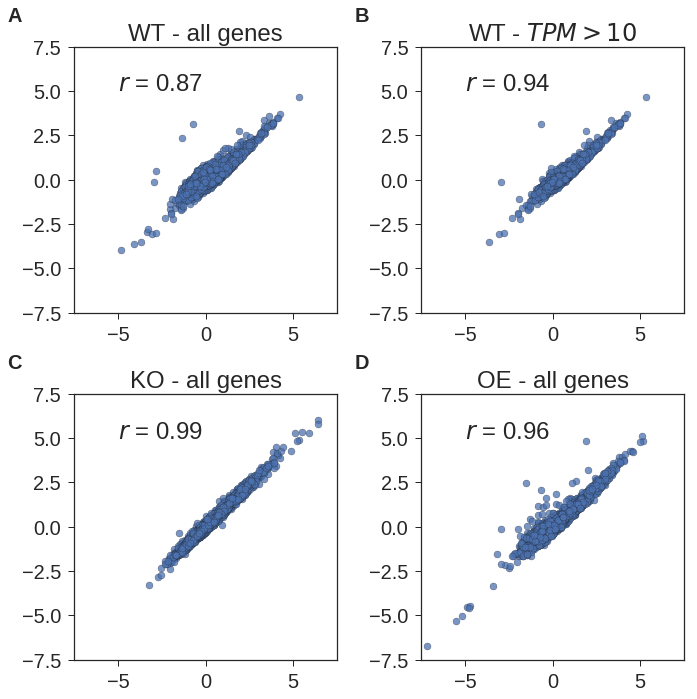

In [671]:
fig = plt.figure(figsize=(10, 10))

for i, label in enumerate(('A', 'B')):
    idx = i + 1
    sample = samples[0]
    if idx == 1:
        df = DFs["TE_" + sample] 
        title = sample + " - all genes" 
    else:
        df = pd.merge(DFs["TE_" + sample], DFs[wt_rep1_riboseq_abundance], left_on="gene", right_on="target_id")
        df = df[df["tpm"] > 10]
        title = sample + " - $TPM>10$" 
    corr = round(pearsonr(df["log2_TE_rep1"], df["log2_TE_rep2"])[0], 2)
    ax = plt.subplot(2, 2, idx)
    ax.scatter(x="log2_TE_rep1", y="log2_TE_rep2", data=df, alpha=0.75, edgecolor="k")
    plt.xlim(-7.5,7.5)
    plt.ylim(-7.5,7.5)
    ax.text(-5, 5, r"$r$ = " + str(corr))
    ax.text(-0.2, 1.15, label, transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
    ax.set_title(title)

for i, label in enumerate(('C', 'D')):
    idx = i + 1
    sample=samples[idx]
    title = sample + " - all genes"
    df = DFs["TE_" + sample]
    corr = round(pearsonr(df["log2_TE_rep1"], df["log2_TE_rep2"])[0], 2)
    ax = plt.subplot(2, 2, idx+2)
    ax.scatter(x="log2_TE_rep1", y="log2_TE_rep2", data=df, alpha=0.75, edgecolor="k")
    plt.xlim(-7.5,7.5)
    plt.ylim(-7.5,7.5)
    ax.text(-5, 5, r"$r$ = " + str(corr))
    ax.text(-0.2, 1.15, label, transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
    ax.set_title(title)
    
plt.tight_layout()
plt.savefig("../Figures/Supplemental/FigureS7_TE_rep_corr.pdf")

## 2. codon elongation rate correlation between replicates

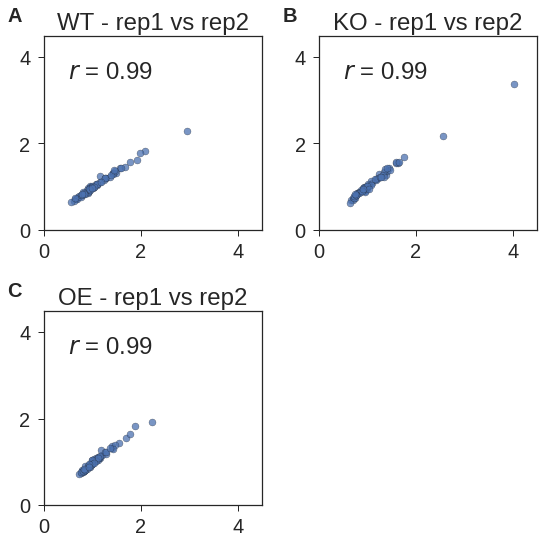

In [672]:
fig = plt.figure(figsize=(8, 8))

for i, label in enumerate(('A', 'B', 'C')):
    idx = i + 1
    sample=samples[i]
    title = sample + " - rep1 vs rep2"
    df = DFs["codon_" + sample]
    corr = round(pearsonr(df["codon_dwell_time_rep1"], df["codon_dwell_time_rep2"])[0], 2)
    ax = plt.subplot(2, 2, idx)
    ax.scatter(x="codon_dwell_time_rep1", y="codon_dwell_time_rep2", data=df, alpha=0.75, edgecolor="k")
    plt.xlim(0, 4.5)
    plt.ylim(0, 4.5)
    ax.text(0.5, 3.5, r"$r$ = " + str(corr))
    ax.text(-0.1, 1.15, label, transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
    ax.set_title(title)
plt.tight_layout()
plt.savefig("../Figures/Supplemental/FigureS8_codon_rep_corr.pdf")

## 3. Compare TE between conditions

### 0) Getting rpkm values from original paper.

In [673]:
original = pd.read_table(original_fn, header=0)
original = pd.merge(original, DFs[gene_tAI], left_on='Gene', right_on="genes_id")

original_map = {"WT_RNA_rep1":"IRWT", "WT_RNA_rep2":"RRWT",
                "WT_Ribo_rep1":"IPWT", "WT_Ribo_rep2":"RPWT",
                "KO_RNA_rep1":"IRDhKO", "KO_RNA_rep2":"RRDhKO",
                "KO_Ribo_rep1":"IPDhKO", "KO_Ribo_rep2":"RPDhKO",
                "OE_RNA_rep1":"IRDhOE", "OE_RNA_rep2":"RRDhOE",
                "OE_Ribo_rep1":"IPDhOE", "OE_Ribo_rep2":"RPDhOE"}
                                                      
for tpm, rpkm in original_map.items():
    original[tpm] = original[rpkm] * 1000000 / np.sum(original[rpkm])

for tpm in original_map.keys():
    original = original[original[tpm] > 0]
print(original.shape)

(5485, 34)


In [674]:
lst = ["WT_RNA", "WT_Ribo", "KO_RNA", "KO_Ribo", "OE_RNA", "OE_Ribo"]

for i in lst:
    original[i] = 1/2 * (original[i + "_rep1"] + original[i + "_rep2"])

original_Ribo_RNA_pairs = {"log2_TE_WT":["IRWT", ("IPWT", "RPWT")],
                           "log2_TE_OE":["IRDhOE", ("IPDhOE", "RPDhOE")],
                           "log2_TE_KO":["RRDhKO", ("IPDhKO", "RPDhKO")],
                          }

for k,v in original_Ribo_RNA_pairs.items():
    original[k + "_rep1"] = np.log2(original[v[1][0]] / original[v[0]])
    original[k + "_rep2"] = np.log2(original[v[1][1]] / original[v[0]])

for k,v in original_Ribo_RNA_pairs.items():
    original[k] = 1/2 * (original[k + "_rep1"] + original[k + "_rep2"])

### 1) Compare scikit-ribo & rpkm estimates

In [675]:
comparisons = [("KO", "WT"), ("OE", "WT"), ("OE", "KO")] 
prefixes = ["skr_", "rpkm_"]
strings = list(string.ascii_uppercase[:12])

In [676]:
# mean of replicates
for prefix in prefixes:
    for comparison in comparisons:
        l, r = comparison
        if prefix == "skr_":
            tmp = pd.merge(DFs["TE_" + l], DFs["TE_" + r], on='gene', suffixes=["_" + l, "_" + r])
            tmp = pd.merge(tmp, DFs[gene_tAI], left_on='gene', right_on="genes_id")
            tmp["log2_TE_" + l] = (tmp["log2_TE_rep1_" + l] + tmp["log2_TE_rep2_" + l]) / 2
            tmp["log2_TE_" + r] = (tmp["log2_TE_rep1_" + r] + tmp["log2_TE_rep2_" + r]) / 2
            tmp["deltaTE"] = tmp["log2_TE_" + l] - tmp["log2_TE_" + r]
            DFs[prefix + l + "_VS_" + r] = tmp
        elif prefix == "rpkm_":
            tmp = original[["Gene", "log2_TE_" + l, "log2_TE_" + r, "stAI", "tAI"]]
            tmp.rename(columns={"Gene": "gene"}, inplace=True)
            tmp["deltaTE"] = tmp["log2_TE_" + l] - tmp["log2_TE_" + r]
            DFs[prefix + l + "_VS_" + r] = tmp

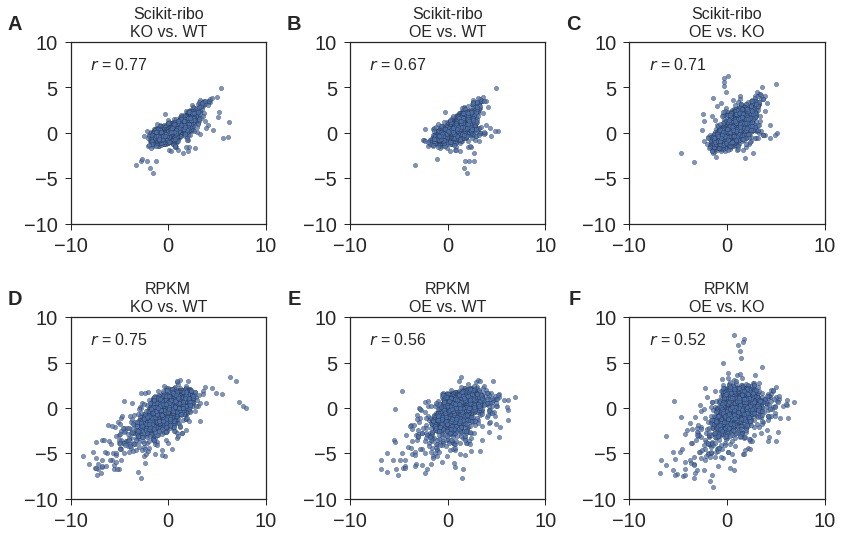

In [677]:
# plot TE correlation
fig = plt.figure(figsize=(12, 8))
i = 0     
for prefix in prefixes:
    for comparison in comparisons:
        fig_idx = strings[i]
        l, r = comparison
        data_prefix = prefix + l + "_VS_" + r
        idx = i + 1
        tool = "Scikit-ribo\n" if prefix == "skr_" else "RPKM\n"
        title = tool + l + " vs. " + r
        df = DFs[data_prefix]
        corr = round(pearsonr(df["log2_TE_" + l], df["log2_TE_" + r])[0], 2)
        ax = plt.subplot(2, 3, idx)
        ax.scatter(x="log2_TE_" + l, y="log2_TE_" + r, data=df, alpha=0.75, edgecolor="k", s=20)
        plt.xlim(-10, 10)
        plt.ylim(-10, 10)
        ax.text(-8, 7, r"$r$ = " + str(corr) , fontsize=16)
        ax.text(-0.25, 1.15, fig_idx, transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
        ax.set_title(title, fontsize=16)
        i += 1
plt.tight_layout()        
plt.savefig("../Figures/Supplemental/FigureS8_TE_strains.pdf")

Number of genes: 3440
('skr_', ('KO', 'WT'))
Upper & lower bound -0.93685 1.7104
Number of genes: 3529
('skr_', ('OE', 'WT'))
Upper & lower bound -0.80465 2.13255
Number of genes: 3587
('skr_', ('OE', 'KO'))
Upper & lower bound -1.6146 1.74695
Number of genes: 3495
('rpkm_', ('KO', 'WT'))
Upper & lower bound -1.48293398172 1.62899534736
Number of genes: 3590
('rpkm_', ('OE', 'WT'))
Upper & lower bound -1.05148896105 2.43109643166
Number of genes: 3644
('rpkm_', ('OE', 'KO'))
Upper & lower bound -1.74670089773 2.70190236703


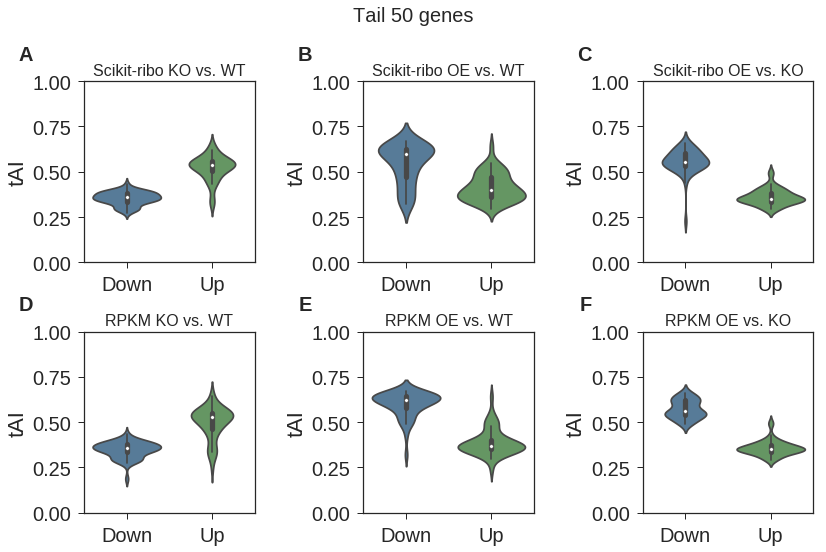

In [678]:
# tail genes comparison
tails_dic = {}
tail = 50
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Tail 50 genes', fontsize=20)

i = 0
for prefix in prefixes:
    for comparison in comparisons:
        idx = i + 1
        fig_idx = strings[i]
        l, r = comparison
        data_prefix = prefix + l + "_VS_" + r
        tmp = DFs[data_prefix].copy()
        tmp = pd.merge(tmp, original, left_on="gene", right_on="Gene")
        tmp = tmp[(tmp[l + "_RNA"] > 10) & (tmp[r + "_RNA"] > 10) & (tmp[l + "_Ribo"] > 10) & (tmp[r + "_Ribo"] > 10)]
        down_tail = tmp.sort_values("deltaTE").head(tail)
        up_tail   = tmp.sort_values("deltaTE", ascending=False).head(tail)
        tails_dic[(prefix, comparison)] = [down_tail, up_tail]
        down_tail[["gene"]].to_csv(path_or_buf="../Data/Radhakrishnan/" + data_prefix + "_down_50.csv", 
                                   sep='\t', header=True, index=False, quoting=csv.QUOTE_NONE) 
        up_tail[["gene"]].to_csv(path_or_buf="../Data/Radhakrishnan/" + data_prefix + "_up_50.csv", 
                                 sep='\t', header=True, index=False, quoting=csv.QUOTE_NONE) 
        # violin tAI in two classes
        down_tail["class"] = "Down"
        up_tail["class"] = "Up"
        tail_combine = pd.concat([down_tail, up_tail])  
        ax = plt.subplot(2, 3, idx)
        sns.violinplot(x="class", y="tAI_x", data=tail_combine, palette=[snsBlue, snsGreen], saturation=1)
        plt.ylabel('tAI') 
        tool = "Scikit-ribo " if prefix == "skr_" else "RPKM "
        title = tool + l + " vs. " + r
        plt.xlabel("")
        ax.set_title(title, fontsize=16)
        plt.ylim(0, 1)
        ax.text(-0.3, 1.2, fig_idx, transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
        i+=1
        print("Number of genes: " + str(tmp.shape[0]))
        print(((prefix, comparison)))
        print("Upper & lower bound", down_tail.tail(1)["deltaTE"].values[0], up_tail.tail(1)["deltaTE"].values[0])

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig("../Figures/Supplemental/FigureS9_tail50_genes_stAI.pdf")

KO VS WT
15 13
OE VS WT
21 13
OE VS KO
16 11
KO VS WT
15 13
OE VS WT
21 13
OE VS KO
16 11


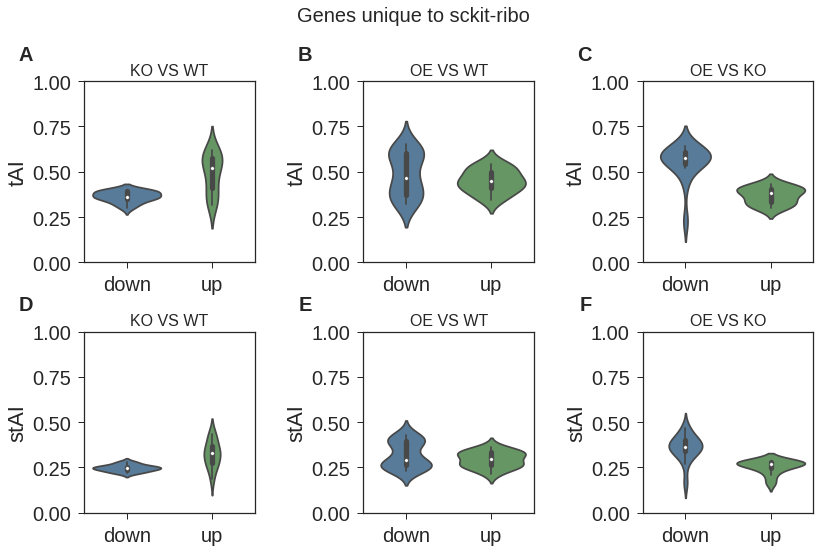

In [679]:
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Genes unique to sckit-ribo', fontsize=20)

i = 0
for y_axis in ["tAI", "stAI"]:
    for comparison in comparisons:
        idx = i + 1
        fig_idx = strings[i]
        l, r = comparison
        skr_down = set(tails_dic[("skr_", comparison)][0]["gene"])
        rpkm_down = set(tails_dic[("rpkm_", comparison)][0]["gene"])
        skr_up = set(tails_dic[("skr_", comparison)][1]["gene"])
        rpkm_up = set(tails_dic[("rpkm_", comparison)][1]["gene"])
        uniq_down = pd.DataFrame([i for i in skr_down if i not in rpkm_down], columns=["gene"])
        uniq_down = pd.merge(uniq_down, original, left_on='gene', right_on="genes_id")
        uniq_down["class"] = "down"
        uniq_up = pd.DataFrame([i for i in skr_up if i not in rpkm_up], columns=["gene"])
        uniq_up = pd.merge(uniq_up, original, left_on='gene', right_on="genes_id")
        uniq_up["class"] = "up"
        uniqs = pd.concat([uniq_down, uniq_up])
        # plot
        ax = plt.subplot(2, 3, idx)
        sns.violinplot(x="class", y=y_axis, data=uniqs, palette=[snsBlue, snsGreen], saturation=1)
        plt.ylabel(y_axis) 
        plt.title(l + " VS " + r , fontsize=16) 
        ax.text(-0.3, 1.2, fig_idx, transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
        plt.xlabel("")
        plt.ylim(0, 1) 
        print( l + " VS " + r )
        print(len(uniq_down), len(uniq_up))
        i += 1 
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig("../Figures/Supplemental/FigureS10_unique_genes.pdf")

(143, 11) (288, 11)
(53, 11) (335, 11)
(220, 11) (269, 11)
(143, 11) (288, 11)
(53, 11) (335, 11)
(220, 11) (269, 11)


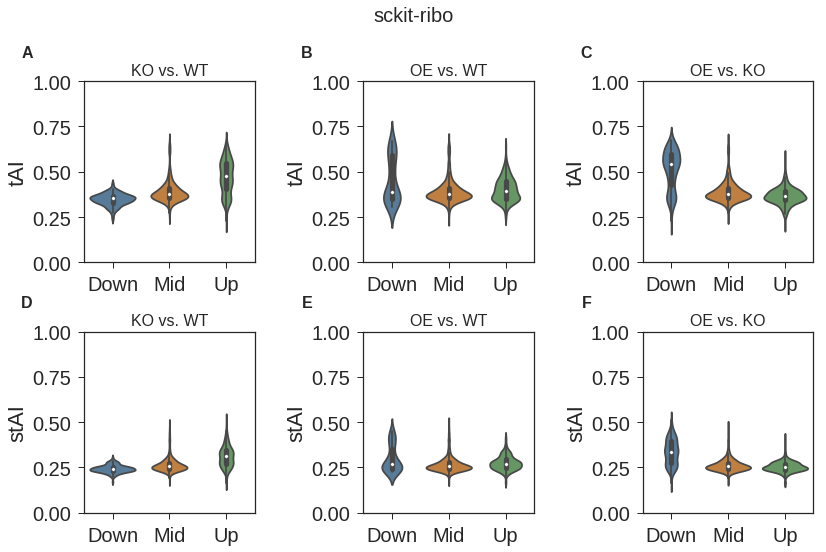

In [680]:
# tAI & stAI in three classes
fig = plt.figure(figsize=(12, 8))
fig.suptitle('sckit-ribo', fontsize=20)
colors = [snsBlue, snsOrange, snsGreen]
prefix="skr_"
i = 0
for y_axis in ["tAI", "stAI"]:
    for comparison in comparisons:
        idx = i + 1
        fig_idx = strings[i]
        l, r = comparison
        data_prefix = prefix + l + "_VS_" + r
        tmp = DFs[data_prefix].copy()
        print(tmp[tmp["deltaTE"] < -deltaTE_cutoff].shape, tmp[tmp["deltaTE"] > deltaTE_cutoff].shape)
        tmp[tmp["deltaTE"] < -deltaTE_cutoff][["gene"]].to_csv(path_or_buf="../Data/Radhakrishnan/" + data_prefix + "_down.csv", 
                                                               sep='\t', header=True, index=False, quoting=csv.QUOTE_NONE) 
        tmp[tmp["deltaTE"] >  deltaTE_cutoff][["gene"]].to_csv(path_or_buf="../Data/Radhakrishnan/" + data_prefix + "_up.csv", 
                                                               sep='\t', header=True, index=False, quoting=csv.QUOTE_NONE) 
        tmp["isDownRegulated"] = np.where(tmp["deltaTE"] < -deltaTE_cutoff, -1, 0) 
        tmp["isUpRegulated"] = np.where(tmp["deltaTE"] > deltaTE_cutoff, 1, 0) 
        tmp["class"] = tmp["isDownRegulated"] + tmp["isUpRegulated"]
        ax = plt.subplot(2, 3, idx)
        sns.violinplot(x="class", y=y_axis, data=tmp, palette=colors, saturation=1)
        plt.ylabel(y_axis) 
        ax.set_xticklabels(["Down", "Mid", "Up"])
        plt.xlabel("")
        # "Down-regulated \n $\Delta$ < -" + str(deltaTE_cutoff), 
        #                      "Mid\n" + "-1<$\Delta$ <1" ,
        #                      "Up-regulated \n $\Delta$ > " + str(deltaTE_cutoff)])
        plt.ylim(0, 1)
        ax.text(-0.3, 1.2, fig_idx, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
        tool = "Scikit-ribo " if prefix == "skr_" else "RPKM "
        plt.title(l + " vs. " + r, fontsize=16) 
        i += 1

plt.tight_layout()             
plt.subplots_adjust(top=0.85)
plt.savefig("../Figures/Supplemental/FigureS11_three_class.pdf")

### 2) Compare RPKM estimates

### OE vs WT
#### down-regulated

|GO Term|	p-Value |	Matches
| :- |-------------: | :-:
|cytosolic ribosome [GO:0022626] |	0.001628 |	10 
|cytosolic part [GO:0044445] |	0.005072 |	11 

#### up-regulated

|GO Term|	p-Value |	Matches
| :- |-------------: | :-:
|purine nucleoside triphosphate metabolic process [GO:0009144]	|3.676616e-23	|42
|purine ribonucleoside triphosphate metabolic process [GO:0009205]	|1.981089e-22|	41
|ATP metabolic process [GO:0046034]	|2.694787e-22|	40
|nucleoside triphosphate metabolic process [GO:0009141]	|3.331368e-22	|43
|ribonucleoside triphosphate metabolic process [GO:0009199] |	1.147398e-21	|41
|purine nucleoside monophosphate metabolic process [GO:0009126]	|5.683788e-19	|41

### KO VS WT
#### Down-regulated: No GO enrichment 
#### Up-regulated
|GO Term|	p-Value |	Matches
| :- |-------------: | :-:
|	purine nucleoside monophosphate metabolic process [GO:0009126]	|1.465617e-11	|31
|	purine ribonucleoside monophosphate metabolic process [GO:0009167]	|1.465617e-11|	31
|	purine ribonucleoside triphosphate metabolic process [GO:0009205]	|4.539720e-11	|28
|	purine nucleoside triphosphate metabolic process [GO:0009144]	|7.742109e-11	|28
|	ribonucleoside triphosphate metabolic process [GO:0009199]	|1.302754e-10	|28

### DQAD VS WT
#### Down-regulated: 
|GO Term|	p-Value |	Matches
| :- |-------------: | :-:
|	mRNA processing [GO:0006397]	|0.008208	|14
|	spliceosomal complex [GO:0005681]	|0.001233|	10
#### Up-regulated : No GO enrichment

### 4) OE VS KO

### OE VS KO
#### Down-regulated: 
|GO Term| p-Value | Matches
| :- |-------------: | :-:
|	cytoplasmic translation [GO:0002181]|	3.286857e-44|	64
|	translation [GO:0006412]|	7.604883e-17|	80
|	ribosome biogenesis [GO:0042254]|	9.762228e-17|	62
|	peptide biosynthetic process [GO:0043043]|	1.065426e-16|	80
|	ribonucleoprotein complex biogenesis [GO:0022613]|	1.716538e-16|	68
|	amide biosynthetic process [GO:0043604]|	3.384313e-16|	82
|	peptide metabolic process [GO:0006518]|	2.521790e-15|	80
|	organonitrogen compound metabolic process [GO:1901564]|	4.557351e-15|	109
|	cellular amide metabolic process [GO:0043603]|	1.089971e-14|	83
|	translational elongation [GO:0006414]|	1.653967e-14|	67
|	ribosome assembly [GO:0042255]|	7.259525e-13|	24

#### Up-regulated : 
|GO Term| p-Value | Matches
| :- |-------------: | :-:	
|mitochondrial part [GO:0044429]	|4.173601e-4|	51
|	inner mitochondrial membrane protein complex [GO:0098800] |	0.001243|	15
|	mitochondrial protein complex [GO:0098798] |	0.002072|	17
|	membrane-bounded organelle [GO:0043227] |	0.007564|	210
|	cell part [GO:0044464] |	0.024648|	249
|	cell [GO:0005623] |	0.025540|	249
|	mitochondrial respiratory chain [GO:0005746] |	0.027369|	8
|	respiratory chain complex [GO:0098803] |	0.027369|	8
|	intracellular membrane-bounded organelle [GO:0043231] |	0.030143|	206

## 4. Compare codon elongation rates between strains

In [681]:
strains = ["WT", "KO", "OE"]
for strain in strains:
    tmp = DFs["codon_" + strain].copy()
    DFs["codon_" + strain]["dwell_time_" + strain] = (tmp["codon_dwell_time_rep1"] + 
                                                         tmp["codon_dwell_time_rep2"]) / 2
    print("s.d.: ",  strain, np.std(DFs["codon_" + strain]["dwell_time_" + strain]))

s.d.:  WT 0.3640642034468501
s.d.:  KO 0.4534280328292334
s.d.:  OE 0.2729516429269326


In [682]:
codon_all_strains = pd.merge(DFs["codon_WT"], DFs["codon_KO"], on="codon")
codon_all_strains = pd.merge(codon_all_strains, DFs["codon_OE"], on="codon")

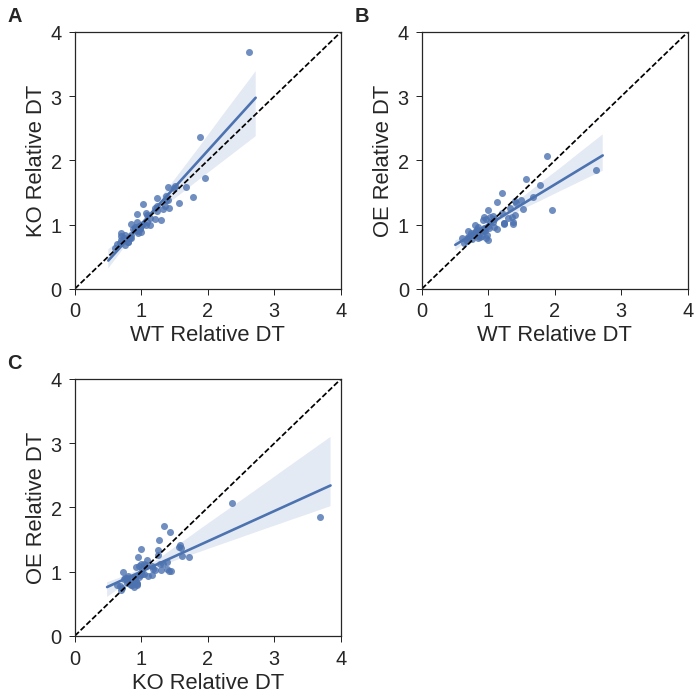

In [683]:
comparisons = [("KO", "WT"), ("OE", "WT"), ("OE", "KO")] 

fig = plt.figure(figsize=(10, 10))

i = 0
for comparison in comparisons:
    l, r = comparison
    fig_idx = strings[i]
    idx = i + 1
    ax = plt.subplot(2, 2, idx)
    sns.regplot(x="dwell_time_" + r, y="dwell_time_" + l, data=codon_all_strains) 
    ax.set_ylabel(l + ' Relative DT')
    ax.set_xlabel(r + " Relative DT")
    ax.set(ylim=(0, 4))
    ax.set(xlim=(0, 4))
    ax.text(-0.2, 1.1, fig_idx, transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
    plt.plot([0, 4], [0, 4], ls="dashed", color='black')
    i += 1
plt.tight_layout()
plt.savefig("../Figures/Supplemental/FigureS12_codon_corr_strains.pdf")

#### Different from paper

In [684]:
codon_all_strains["delta_DT_OE_VS_WT"] = codon_all_strains["dwell_time_OE"] / codon_all_strains["dwell_time_WT"]
codon_all_strains["delta_DT_OE_VS_KO"] = codon_all_strains["dwell_time_OE"] / codon_all_strains["dwell_time_KO"]

In [685]:
codon_all_strains = pd.merge(codon_all_strains, DFs[codon_stAI], on="codon")
codon_all_strains = pd.merge(codon_all_strains, DFs[codon_tAI], on="codon")
codon_all_strains['dwell_time_WT_rank'] = codon_all_strains['dwell_time_WT'].rank(ascending=1)

In [686]:
codon_all_strains[codon_all_strains["delta_DT_OE_VS_WT"] < 0.8].sort_values("delta_DT_OE_VS_WT")

,codon,codon_dwell_time_rep1_x,codon_dwell_time_rep2_x,dwell_time_WT,codon_dwell_time_rep1_y,codon_dwell_time_rep2_y,dwell_time_KO,codon_dwell_time_rep1,codon_dwell_time_rep2,dwell_time_OE,delta_DT_OE_VS_WT,delta_DT_OE_VS_KO,stAI,tAI,dwell_time_WT_rank
21,CCC,2.0917,1.8245,1.95810,1.7545,1.6922,1.72335,1.1827,1.2618,1.22225,0.624202,0.709229,0.219,0.089,60.0
22,CCG,2.9446,2.2907,2.61765,4.0101,3.3741,3.69210,1.8879,1.8222,1.85505,0.708670,0.502438,0.393,0.197,61.0
20,CCA,1.4278,1.3273,1.37755,1.4522,1.4339,1.44305,0.9871,1.0347,1.01090,0.733839,0.700530,0.518,0.616,50.0
23,CCT,1.4351,1.3085,1.37180,1.4095,1.3593,1.38440,1.0318,1.0589,1.04535,0.762028,0.755092,0.104,0.123,49.0
39,GCT,1.0000,0.9914,0.99570,0.8729,0.9108,0.89185,0.7607,0.7706,0.76565,0.768957,0.858496,0.569,0.677,31.0


In [687]:
codon_all_strains[codon_all_strains["delta_DT_OE_VS_WT"] > 1.2].sort_values("delta_DT_OE_VS_WT", ascending=False)

,codon,codon_dwell_time_rep1_x,codon_dwell_time_rep2_x,dwell_time_WT,codon_dwell_time_rep1_y,codon_dwell_time_rep2_y,dwell_time_KO,codon_dwell_time_rep1,codon_dwell_time_rep2,dwell_time_OE,delta_DT_OE_VS_WT,delta_DT_OE_VS_KO,stAI,tAI,dwell_time_WT_rank
19,CAT,0.5709,0.6389,0.6049,0.6541,0.6248,0.63945,0.8077,0.7672,0.78745,1.301785,1.231449,0.048,0.189,1.0
57,TTA,0.6449,0.7471,0.6960,0.7337,0.7792,0.75645,0.9081,0.8940,0.90105,1.294612,1.191156,0.362,0.431,5.0
31,CTT,0.9515,1.0225,0.9870,0.9286,0.9807,0.95465,1.2859,1.1718,1.22885,1.245035,1.287226,0.007,0.027,29.0
56,TGT,0.7988,0.8086,0.8037,0.7311,0.7253,0.72820,1.0293,0.9629,0.99610,1.239393,1.367893,0.028,0.108,11.0
29,CTC,1.1620,1.2444,1.2032,1.2312,1.2890,1.26010,1.5491,1.4305,1.48980,1.238198,1.182287,0.052,0.062,42.0


In [688]:
codon_all_strains[codon_all_strains["codon"] == "AGG"]

,codon,codon_dwell_time_rep1_x,codon_dwell_time_rep2_x,dwell_time_WT,codon_dwell_time_rep1_y,codon_dwell_time_rep2_y,dwell_time_KO,codon_dwell_time_rep1,codon_dwell_time_rep2,dwell_time_OE,delta_DT_OE_VS_WT,delta_DT_OE_VS_KO,stAI,tAI,dwell_time_WT_rank
10,AGG,1.4876,1.3264,1.407,1.6386,1.5428,1.5907,1.4114,1.3282,1.3698,0.973561,0.86113,0.485,0.278,52.0


In [689]:
# purine ribonucleoside triphosphate metabolic process [GO:0009205]
KO_VS_WT_Up_GO_genes = pd.DataFrame(["YBL099W", "YFR053C", "YJL052W", "YKL016C",
                                     "YLR134W", "YML056C", "YMR256C", "YOR065W"], columns=["gene"])
# translational elongation [GO:0006414]
OE_VS_WT_Down_GO_genes = pd.DataFrame(["YAL003W", "YBR048W", "YCR031C", "YDL075W", "YDL082W", "YDL083C", "YDL160C", 
                                       "YDL229W","YDR025W", "YDR450W", "YER074W", "YGR214W", "YIL069C", "YJR047C", 
                                       "YKR094C", "YLL045C","YLR048W", "YLR406C", "YMR116C", "YMR143W", "YNL301C", 
                                       "YOR096W", "YPL198W"], columns=["gene"])
# ATP metabolic process [GO:0046034]
OE_VS_WT_Up_GO_genes = pd.DataFrame(["YDR377W", "YFR053C", "YGL191W", "YGR183C", 
                                     "YJL166W", "YKL016C", "YMR256C", "YNL052W"], columns=["gene"]) 

In [690]:
KO_VS_WT_Up_GO_genes["class"] = "Up - KO"
OE_VS_WT_Down_GO_genes["class"] = "Down - OE"
OE_VS_WT_Up_GO_genes["class"] = "UP - OE"

KO_VS_WT_Up_GO_genes = pd.merge(KO_VS_WT_Up_GO_genes, DFs[gene_tAI], left_on="gene", right_on="genes_id")
OE_VS_WT_Down_GO_genes = pd.merge(OE_VS_WT_Down_GO_genes, DFs[gene_tAI], left_on="gene", right_on="genes_id")
OE_VS_WT_Up_GO_genes = pd.merge(OE_VS_WT_Up_GO_genes, DFs[gene_tAI], left_on="gene", right_on="genes_id")
GO_genes = pd.concat([KO_VS_WT_Up_GO_genes, OE_VS_WT_Down_GO_genes, OE_VS_WT_Up_GO_genes])

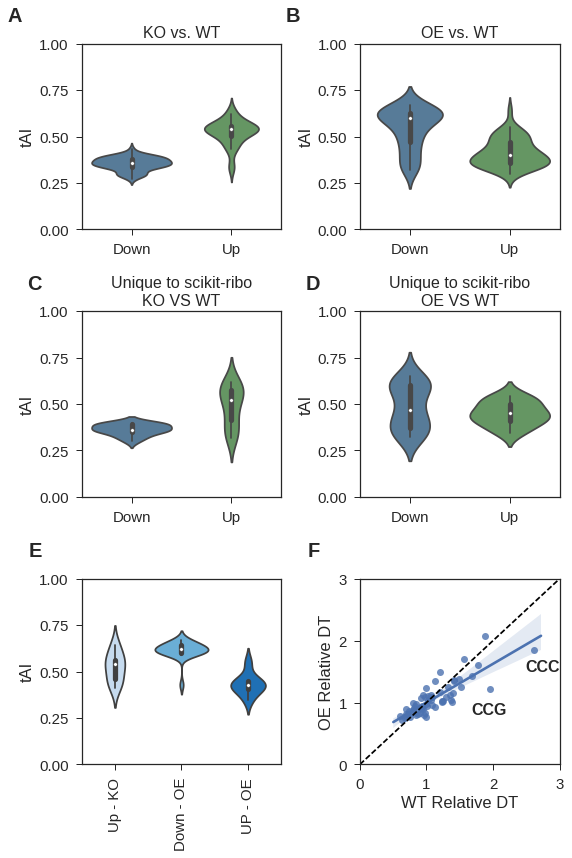

In [691]:
sns.set(style="ticks", color_codes=True,font_scale=1.5)

fig = plt.figure(figsize=(8, 12))

main_comparisons = [("KO", "WT"), ("OE", "WT")] 

i = 0
for comparison in main_comparisons:
    idx = i + 1
    fig_idx = strings[i]
    l, r = comparison
    data_prefix = prefix + l + "_VS_" + r
    tmp = DFs[data_prefix].copy()
    tmp = pd.merge(tmp, original, left_on="gene", right_on="Gene")
    tmp = tmp[(tmp[l + "_RNA"] > 10) & (tmp[r + "_RNA"] > 10) & (tmp[l + "_Ribo"] > 10) & (tmp[r + "_Ribo"] > 10)]
    down_tail = tmp.sort_values("deltaTE").head(tail)
    up_tail   = tmp.sort_values("deltaTE", ascending=False).head(tail)
    # violin tAI in two classes
    down_tail["class"] = "Down"
    up_tail["class"] = "Up"
    tail_combine = pd.concat([down_tail, up_tail])  
    ax = plt.subplot(3, 2, idx)
    sns.violinplot(x="class", y="tAI_x", data=tail_combine, palette=[snsBlue, snsGreen], saturation=1)
    plt.ylabel('tAI') 
    title = l + " vs. " + r
    plt.xlabel("")
    ax.set_title(title, fontsize=16)
    plt.ylim(0, 1)
    ax.text(-0.3, 1.2, fig_idx, transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
    i += 1

for comparison in main_comparisons:
    idx = i + 1
    fig_idx = strings[i]
    l, r = comparison
    skr_down = set(tails_dic[("skr_", comparison)][0]["gene"])
    rpkm_down = set(tails_dic[("rpkm_", comparison)][0]["gene"])
    skr_up = set(tails_dic[("skr_", comparison)][1]["gene"])
    rpkm_up = set(tails_dic[("rpkm_", comparison)][1]["gene"])
    uniq_down = pd.DataFrame([i for i in skr_down if i not in rpkm_down], columns=["gene"])
    uniq_down = pd.merge(uniq_down, original, left_on='gene', right_on="genes_id")
    uniq_down["class"] = "Down"
    uniq_up = pd.DataFrame([i for i in skr_up if i not in rpkm_up], columns=["gene"])
    uniq_up = pd.merge(uniq_up, original, left_on='gene', right_on="genes_id")
    uniq_up["class"] = "Up"
    uniqs = pd.concat([uniq_down, uniq_up])
    # plot
    ax = plt.subplot(3, 2, idx)
    sns.violinplot(x="class", y="tAI", data=uniqs, palette=[snsBlue, snsGreen], saturation=1)
    plt.ylabel("tAI") 
    plt.title("Unique to scikit-ribo\n" + l + " VS " + r , fontsize=16) 
    ax.text(-0.2, 1.2, fig_idx, transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
    plt.xlabel("")
    plt.ylim(0, 1) 
    i += 1 

# GO genes
fig_idx = strings[i]
idx = i + 1
ax = plt.subplot(3, 2, idx)
g= sns.violinplot(x="class", y="tAI", data=GO_genes, palette="Blues", saturation=1)
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.xlabel("")
ax.text(-0.2, 1.2, fig_idx, transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
i += 1
    
# codon
l, r = ("OE", "WT")
fig_idx = strings[i]
idx = i + 1
ax = plt.subplot(3, 2, idx)
sns.regplot(x="dwell_time_" + r, y="dwell_time_" + l, data=codon_all_strains) 
ax.set_ylabel(l + ' Relative DT')
ax.set_xlabel(r + " Relative DT")
ax.set(ylim=(0, 3))
ax.set(xlim=(0, 3))
ax.text(-0.2, 1.2, fig_idx, transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
ax.text(2.2, 1, "CCG", fontsize=16, fontweight='bold', va='top', ha='right')
ax.text(3, 1.7, "CCC", fontsize=16, fontweight='bold', va='top', ha='right')
plt.plot([0, 3], [0, 3], ls="dashed", color='black')
i += 1
    
plt.tight_layout()
plt.savefig("../Figures/Figure6_Dhh1p.pdf")
sns.set(style="ticks", color_codes=True,font_scale=2)
